In [1]:
import pickle

import grelu.sequence.format

import scanpy as sc
import pandas as pd
import torch
# import pickle
# with open('/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/BTNL3_allsampleidx.pickle', 'rb') as fp:
#     seq_list = pickle.load(fp)
    
    
# import pickle
# with open('/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/all_selected_gene.pickle', 'rb') as fp:
#     seq_list = pickle.load(fp)

import pickle
with open('/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/all_selected_gene_understand_hert.pickle', 'rb') as fp:
    seq_list = pickle.load(fp)

In [2]:
a = 1

In [3]:
# import pickle
# with open('/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/all_selected_gene_geneidmap.pickle', 'rb') as fp:
#     gene_list = pickle.load(fp)

import pickle
with open('/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/all_selected_gene_understand_hert_geneidmap.pickle', 'rb') as fp:
    gene_list = pickle.load(fp)

In [4]:
gene_list

{'MFSD9': 0,
 'PAM': 1,
 'MDGA1': 2,
 'TREML4': 3,
 'CNR1': 4,
 'PILRA': 5,
 'TMEM176A': 6,
 'TMEM176B': 7,
 'NIPAL2': 8,
 'LRRC6': 9,
 'PRUNE2': 10,
 'ADARB2': 11,
 'TMTC1': 12,
 'SLC12A1': 13,
 'NDEL1': 14,
 'JUP': 15,
 'PEX11G': 16,
 'RPS28': 17,
 'APOBEC3B': 18}

In [5]:
gene_name = "JUP"

In [6]:
seq_list = seq_list[gene_list[gene_name]]

In [7]:
# ukbb_data_sample = torch.load(f"/gpfs/radev/project/ying_rex/tl688/seq2cells_code/tests/{gene_name}_ukbiobert_emb_concat_49000_mean.pkl")

ukbb_data_sample = torch.load(f"/home/tl688/pitl688/enformer_fine_tuning/all_gtex_human_sample/{gene_name}_ukbiobert_emb_concat_49000_mean.pkl")

In [8]:
gene_exp = pd.read_csv("/home/tl688/pitl688/enformer_fine_tuning/data/gtex_eqtl_expression_matrix/Whole_Blood.v8.normalized_expression_genesymbol.csv", sep='\t')
df_gene_test = gene_exp[gene_exp['gene_symbol'].isin([gene_name])]
idx_gene = df_gene_test.index

In [9]:
df_gene_test

,Unnamed: 0,#chr,start,end,gene_id,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,...,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5,gene_symbol
15903,15903,chr17,41786930,41786931,ENSG00000173801.16,-2.007378,-0.163223,0.591185,0.376684,0.811136,...,-0.627164,-1.401871,-1.209352,0.054194,2.368016,-1.610437,0.31324,0.678011,-0.735562,JUP


In [10]:
print(idx_gene)

Index([15903], dtype='int64')


In [11]:
gene_exp = pd.read_csv("/home/tl688/pitl688/enformer_fine_tuning/data/gtex_eqtl_expression_matrix/Whole_Blood.v8.normalized_expression_genesymbol.csv", sep='\t')

In [12]:
import grelu.sequence.format

In [13]:
import scanpy as sc
import pandas as pd

In [14]:
df = pd.read_csv("/home/tl688/pitl688/enformer_fine_tuning/data/gtex_eqtl_expression_matrix/Whole_Blood.v8.normalized_expression_genesymbol.csv", sep='\t')

In [15]:
df_map = pd.read_csv("/home/tl688/pitl688/enformer_fine_tuning/data/gtex_eqtl_expression_matrix/gene_id_mapping.csv")

In [16]:
df_map

,Unnamed: 0,Name,Description
0,0,ENSG00000223972.5,DDX11L1
1,1,ENSG00000227232.5,WASH7P
2,2,ENSG00000278267.1,MIR6859-1
3,3,ENSG00000243485.5,MIR1302-2HG
4,4,ENSG00000237613.2,FAM138A
...,...,...,...
56195,56195,ENSG00000198695.2,MT-ND6
56196,56196,ENSG00000210194.1,MT-TE
56197,56197,ENSG00000198727.2,MT-CYB
56198,56198,ENSG00000210195.2,MT-TT


In [17]:
import glob

In [18]:
ind_set = []
for item in glob.glob("/home/tl688/scratch/ConsensusSeqs_SNPsOnlyUnphased/*"):
    item_f = item.split('/')[-1].split('_')[0]
    ind_set.append(item_f)

In [19]:
ind_list = sorted(set(ind_set))

In [20]:
len(ind_list)

838

In [21]:
import grelu

In [22]:
grelu

<module 'grelu' from '/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/grelu/__init__.py'>

In [23]:
# df.head()

In [24]:
list_f = sorted(set(df.columns).intersection(ind_list))

In [25]:
len(list_f)

670

In [26]:
from sklearn.metrics import r2_score
import scipy.stats
import sklearn.metrics

In [27]:
df_train_update = pd.DataFrame(seq_list['H2'])

In [28]:
df_train_update.index = list_f

In [29]:
gene_exp = pd.read_csv("/home/tl688/pitl688/enformer_fine_tuning/data/gtex_eqtl_expression_matrix/Whole_Blood.v8.normalized_expression_genesymbol.csv", sep='\t')

In [30]:
# gene_exp_train

In [31]:
gene_exp_train = gene_exp[list_f]

In [32]:
import os

In [33]:
import sklearn
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=2024, shuffle=True, )
kf.get_n_splits(df_train_update.index)

5

In [34]:
import shutil

In [35]:
seq_len = 49000

In [36]:
start = 100000 - seq_len//2
end = 100000 + seq_len//2

In [37]:
# df_train_update.values

In [38]:
df_train_update.values.shape

(670, 1)

In [39]:
df_train_update = pd.DataFrame([i[start:end] for i in seq_list['H2']])

df_train_update.index = list_f

In [40]:
# data_list = []
# for i, (train_index, test_index) in enumerate(kf.split(df_train_update.index)):
#     if i!=4:
#         train_id = df_train_update.index[train_index]
#         test_id = df_train_update.index[test_index]

#         id_train, id_valid = sklearn.model_selection.train_test_split(train_id)
        
#         start = 100000 - seq_len//2
#         end = 100000 + seq_len//2

#         data_train =df_train_update.loc[id_train].values
#         y_train = gene_exp_train.loc[idx_gene,id_train].values[0]

#         data_valid = df_train_update.loc[id_valid].values
#         y_valid = gene_exp_train.loc[idx_gene,id_valid].values[0]

#         data_test = df_train_update.loc[test_id].values
#         y_test = gene_exp_train.loc[idx_gene,test_id].values[0]

#         experiment='tutorial_enformer_1e4_singleseq_H2'
#         if not os.path.exists(experiment):
#             os.makedirs(experiment)
#         else:
#             files = glob.glob(experiment + "/*")
#             for f in files:
#                 shutil.rmtree(f)

#         import grelu.data.dataset
#         df_train = pd.DataFrame()
#         df_train['input_seq'] = data_train.flatten()
#         df_train['label'] = y_train

#         train_dataset = grelu.data.dataset.DFSeqDataset(df_train)

#         df_valid = pd.DataFrame()
#         df_valid['input_seq'] =data_valid.flatten()
#         df_valid['label'] = y_valid

#         valid_dataset = grelu.data.dataset.DFSeqDataset(df_valid)

#         df_test = pd.DataFrame()
#         df_test['input_seq'] = data_test.flatten()
#         df_test['label'] = y_test

#         test_dataset = grelu.data.dataset.DFSeqDataset(df_test)

#         model_params = {
#             'model_type':'EnformerPretrainedModel', # Type of model
#             'n_tasks': 1, # Number of cell types to predict
#             'crop_len':0, # No cropping of the model output
#             'n_transformers': 11, # Number of transformer layers; the published Enformer model has 11
#         }

#         train_params = {
#             'task':'regression', # binary classification
#             'lr':5e-4, # learning rate
#             'logger': 'csv', # Logs will be written to a CSV file
#             'batch_size': 32,
#             'num_workers': 8,
#             'devices': 0, # GPU index
#             'save_dir': experiment,
#             'optimizer': 'adam',
#             'max_epochs': 100,
#             'checkpoint': True, # Save checkpoints
#             'loss': 'mse'
#         }

#         import grelu.lightning
#         model = grelu.lightning.LightningModel(model_params=model_params, train_params=train_params)

#         # See the 'tutorial_2' folder for logs
#         trainer = model.train_on_dataset(
#             train_dataset=train_dataset,
#             val_dataset=valid_dataset
#         )

#         best_checkpoint = trainer.checkpoint_callback.best_model_path
#         # best_checkpoint = 'tutorial_enformer_1e4/2024_23_10_15_30/version_0/checkpoints/epoch=17-step=1782.ckpt'
#         print(best_checkpoint)
#         model = grelu.lightning.LightningModel.load_from_checkpoint(best_checkpoint)

#         probs = model.predict_on_dataset(
#         test_dataset,
#         devices=0,
#         num_workers=8,
#         batch_size=1,
#         return_df=True)

#         probs.to_csv(f"./fold_pred/{gene_name}_enformer_H2_49000_fold{i}.csv")
    

In [41]:
# data_train

In [42]:
# probs

In [43]:
# len(seq_list['H1'])

In [44]:
import grelu.data.dataset

In [45]:
seq_all = []
for i in range(len(seq_list['H1'])):
    str1 = seq_list['H1'][i] 
    str2 = seq_list['H2'][i]
    str1 = grelu.data.dataset.indices_to_one_hot(grelu.data.dataset.strings_to_indices(str1))
    str2 = grelu.data.dataset.indices_to_one_hot(grelu.data.dataset.strings_to_indices(str2))
    merge_list = (str1+str2) / 2
    ukbb_emb = ukbb_data_sample[i].reshape(1,-1).repeat(4,1)
    merge_list = torch.cat((merge_list[:,start:end],ukbb_emb), axis=1)
    seq_all.append(merge_list)

In [46]:
# df_train_update = pd.DataFrame([i[start:end] for i in seq_list['H2']])

# df_train_update.index = list_f

In [47]:
np.array(seq_all).shape

(670, 4, 50536)

In [48]:
# df_train_update = pd.DataFrame([i[start:end] for i in seq_all])
# df_train_update.index = list_f

In [49]:
df_train_update = pd.DataFrame(list_f)

In [50]:
gene_exp_train

,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,GTEX-117XS,GTEX-117YW,GTEX-1192W,GTEX-1192X,GTEX-11DXX,...,GTEX-ZV7C,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5
0,-1.225024,-0.853391,0.429361,0.853391,-0.706494,1.290949,0.805956,-0.313240,-0.046713,-0.189784,...,0.564697,-1.135099,-0.479065,-0.170799,-1.079918,0.148098,0.372677,0.948702,-0.517128,0.765266
1,-0.673318,0.121709,-0.654690,-1.178870,-0.837370,-0.289783,-0.627164,0.197397,-1.596922,1.164031,...,1.171418,0.231802,1.060053,0.925522,-0.167010,0.673318,0.555955,-0.716116,-0.600107,-0.321097
2,0.301491,0.858780,-0.437569,-1.558035,-0.770282,-1.698472,-1.401871,-0.483259,-0.966428,1.821345,...,0.325032,-1.241002,0.013075,0.529981,-2.134683,-0.031758,2.614268,-1.509592,0.328973,0.151876
3,0.417104,0.376684,0.816338,-2.614268,-0.931270,-0.372677,-1.021528,-0.582310,-1.509592,0.348756,...,-0.235641,-0.313240,-0.001868,0.429361,-1.558035,1.009019,1.114008,-1.100218,-0.356707,-0.065421
4,0.891654,0.309319,1.178870,-2.614268,-0.821562,-0.811136,-0.560321,0.035496,-1.142243,0.057935,...,-0.604585,-0.254890,-0.313240,0.372677,-1.883649,0.760269,0.396813,-1.862071,-0.372677,-0.274234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,0.251033,1.047038,-0.891654,-1.453624,-0.061677,-0.654690,-1.714493,-0.914116,-0.622623,1.372539,...,0.591185,0.376684,0.360690,0.525687,-1.241002,0.133007,1.509592,-0.755291,-0.050453,-0.336870
20311,0.682720,2.099561,-0.305403,-0.258751,-0.659325,-1.698472,-0.512862,-0.569083,-0.826808,0.984462,...,0.837370,2.134683,-0.031758,1.596922,-1.186387,0.842686,1.178870,-1.265581,0.174591,0.352728
20312,0.560321,0.730675,-0.765266,0.258751,0.500121,-1.453624,-1.570734,-1.047038,-0.050453,1.040597,...,1.066627,-0.591185,1.464454,1.047038,-0.356707,0.129239,0.687444,-0.931270,0.504359,0.278115
20313,-1.021528,-1.047038,-0.170799,0.716116,-0.110426,0.645460,1.171418,0.538598,-1.610437,0.039235,...,-0.305403,0.243330,-0.421183,-0.914116,0.167010,-0.282000,-1.002823,1.714493,0.332919,0.388743


In [51]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

In [52]:
gene_name

'JUP'

In [53]:
import shutil

In [54]:
# data_list = []
# for i, (train_index, test_index) in enumerate(kf.split(df_train_update.index)):
# #     if i==4:
#     train_id = df_train_update.index[train_index]
#     test_id = df_train_update.index[test_index]

# #     id_train, id_valid = sklearn.model_selection.train_test_split(train_id)
#     id_train = train_id
#     id_valid = test_id
    
#     data_train =np.array(seq_all)[id_train,:,:]
#     y_train = gene_exp_train.iloc[idx_gene,id_train].values[0]

#     data_valid = np.array(seq_all)[id_valid,:,:]
#     y_valid = gene_exp_train.iloc[idx_gene,id_valid].values[0]

#     data_test = np.array(seq_all)[test_id,:,:]
#     y_test = gene_exp_train.iloc[idx_gene,test_id].values[0]

#     experiment='/home/tl688/scratch/tutorial_enformer_ukbiobertexplain_new'
#     if not os.path.exists(experiment):
#         os.makedirs(experiment)
#     else:
#         files = glob.glob(experiment + "/*")
#         for f in files:
#             shutil.rmtree(f)

#     import grelu.data.dataset

#     train_dataset = grelu.data.dataset.LabeledOneHotDataset(seqs=data_train,labels=y_train, seq_len=seq_len, tasks=['pred'])

#     valid_dataset = grelu.data.dataset.LabeledOneHotDataset(seqs=data_valid,labels=y_valid, seq_len=seq_len, tasks=['pred'])

#     test_dataset = grelu.data.dataset.LabeledOneHotDataset(seqs=data_test,labels=y_test, seq_len=seq_len, tasks=['pred'])

#     model_params = {
#         'model_type':'UKBioBERT_EnformerPretrainedModel', # Type of model
#         'n_tasks': 1, # Number of cell types to predict
#         'crop_len':0, # No cropping of the model output
#         'n_transformers': 1, # Number of transformer layers; the published Enformer model has 11
#     }

#     train_params = {
#         'task':'regression', # binary classification
#         'lr':5e-6, # learning rate
#         'logger': 'csv', # Logs will be written to a CSV file
#         'batch_size': 6,
#         'num_workers': 8,
#         'devices': 0, # GPU index
#         'save_dir': experiment,
#         'optimizer': 'adam',
#         'max_epochs': 100,
#         'checkpoint': True, # Save checkpoints
#         'loss': 'MSE'
#     }

#     import grelu.lightning
#     model = grelu.lightning.LightningModel(model_params=model_params, train_params=train_params)
#     model.explain = False

#     # See the 'tutorial_2' folder for logs
#     trainer = model.train_on_dataset(
#         train_dataset=train_dataset,
#         val_dataset=valid_dataset)

# #         trainer = Trainer(callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=20)])

#     best_checkpoint = trainer.checkpoint_callback.best_model_path
#     # best_checkpoint = 'tutorial_enformer_1e4/2024_23_10_15_30/version_0/checkpoints/epoch=17-step=1782.ckpt'
#     print(best_checkpoint)
#     model = grelu.lightning.LightningModel.load_from_checkpoint(best_checkpoint)

#     probs = model.predict_on_dataset(
#     test_dataset,
#     devices=0,
#     num_workers=8,
#     batch_size=1,
#     return_df=True)

# #     probs.to_csv(f"./fold_pred/{gene_name}_enformer_H1H2_49000_adam_5layer_mse_fold{i}.csv")
#     break

In [55]:
# best_checkpoint

In [56]:
'''old one, train, valid, test'''
experiment='/home/tl688/scratch/tutorial_enformer_ukbiobertexplain'
model_params = {
    'model_type':'UKBioBERT_EnformerPretrainedModel', # Type of model
    'n_tasks': 1, # Number of cell types to predict
    'crop_len':0, # No cropping of the model output
    'n_transformers': 1, # Number of transformer layers; the published Enformer model has 11
}

train_params = {
    'task':'regression', # binary classification
    'lr':5e-6, # learning rate
    'logger': 'csv', # Logs will be written to a CSV file
    'batch_size': 6,
    'num_workers': 8,
    'devices': 0, # GPU index
    'save_dir': experiment,
    'optimizer': 'adam',
    'max_epochs': 100,
    'checkpoint': True, # Save checkpoints
    'loss': 'MSE'
}

import grelu.lightning
model = grelu.lightning.LightningModel(model_params=model_params, train_params=train_params)
best_checkpoint = "/home/tl688/scratch/tutorial_enformer_ukbiobertexplain/2024_12_12_08_10/version_0/checkpoints/epoch=73-step=4958.ckpt"
# best_checkpoint = 'tutorial_enformer_1e4/2024_23_10_15_30/version_0/checkpoints/epoch=17-step=1782.ckpt'
print(best_checkpoint)
model = grelu.lightning.LightningModel.load_from_checkpoint(best_checkpoint)

# '''new one, train valid'''
# experiment='/home/tl688/scratch/tutorial_enformer_ukbiobertexplain_new/'
# model_params = {
#     'model_type':'UKBioBERT_EnformerPretrainedModel', # Type of model
#     'n_tasks': 1, # Number of cell types to predict
#     'crop_len':0, # No cropping of the model output
#     'n_transformers': 1, # Number of transformer layers; the published Enformer model has 11
# }

# train_params = {
#     'task':'regression', # binary classification
#     'lr':5e-6, # learning rate
#     'logger': 'csv', # Logs will be written to a CSV file
#     'batch_size': 6,
#     'num_workers': 8,
#     'devices': 0, # GPU index
#     'save_dir': experiment,
#     'optimizer': 'adam',
#     'max_epochs': 100,
#     'checkpoint': True, # Save checkpoints
#     'loss': 'MSE'
# }

# import grelu.lightning
# model = grelu.lightning.LightningModel(model_params=model_params, train_params=train_params)
# best_checkpoint = "/home/tl688/scratch/tutorial_enformer_ukbiobertexplain_new/2024_14_12_09_48/version_0/checkpoints/epoch=97-step=8820.ckpt"
# # best_checkpoint = 'tutorial_enformer_1e4/2024_23_10_15_30/version_0/checkpoints/epoch=17-step=1782.ckpt'
# print(best_checkpoint)
# model = grelu.lightning.LightningModel.load_from_checkpoint(best_checkpoint)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tianyu-18 (zhao-lab). Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact human_state_dict:latest, 939.29MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6


/home/tl688/scratch/tutorial_enformer_ukbiobertexplain/2024_12_12_08_10/version_0/checkpoints/epoch=73-step=4958.ckpt


wandb: Downloading large artifact human_state_dict:latest, 939.29MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6


In [57]:
import grelu.lightning

In [58]:
model.explain = True

In [59]:
torch.randn(1)

tensor([0.8766])

In [60]:
torch.Tensor(1)

tensor([6.3150e-31])

In [61]:
# # best_checkpoint = trainer.checkpoint_callback.best_model_path
# best_checkpoint = 'tutorial_enformer_1e4_singleseq_H1H2_explain/2024_28_11_08_44/version_0/checkpoints/epoch=94-step=19095.ckpt'

In [62]:
# model = grelu.lightning.LightningModel.load_from_checkpoint(best_checkpoint)

In [63]:
# !ssh r4519u01n01

In [64]:
model

LightningModel(
  (model): UKBioBERT_EnformerPretrainedModel(
    (embedding): EnformerTrunk(
      (conv_tower): EnformerConvTower(
        (blocks): ModuleList(
          (0): Sequential(
            (0): Conv1d(4, 768, kernel_size=(15,), stride=(1,), padding=same)
            (1): ConvBlock(
              (norm): Norm(
                (layer): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (conv): Conv1d(768, 768, kernel_size=(1,), stride=(1,), padding=same)
              (act): Activation(
                (layer): GELU()
              )
              (pool): Pool(
                (layer): AttentionPool(
                  (pool_fn): Rearrange('b d (n p) -> b d n p', p=2)
                  (to_attn_logits): Conv2d(768, 768, kernel_size=(1, 1), stride=(1, 1), bias=False)
                )
              )
              (dropout): Dropout(
                (layer): Identity()
              )
              (channel_transform)

# Test variant effect

In [65]:
import pickle

In [66]:
import pickle
with open('/home/tl688/project/grelu/test_ukbiobank_simresult.pickle', 'rb') as fp:
    test = pickle.load(fp)

In [67]:
len(test['effect_size'])

28

In [68]:
'''
snpid	chrom	pos	alt	ref	rsid	zscore	pval	nsum	neff	direction	eaf	beta	se
0	6:32630634_G_A	chr6	32630634	G	A	6:32630634	3.974476	0.000071	71639	71639.0	?+?+	0.2237	0.025194	0.006339
1	6:32630797_A_G	chr6	32630797	A	G	6:32630797	4.040244	0.000053	71639	71639.0	?+?+	0.2435	0.024866	0.006155
2	6:32630824_T_C	chr6	32630824	T	C	6:32630824	3.921736	0.000088	71639	71639.0	?+?+	0.1859	0.026630	0.006790
'''

'\nsnpid\tchrom\tpos\talt\tref\trsid\tzscore\tpval\tnsum\tneff\tdirection\teaf\tbeta\tse\n0\t6:32630634_G_A\tchr6\t32630634\tG\tA\t6:32630634\t3.974476\t0.000071\t71639\t71639.0\t?+?+\t0.2237\t0.025194\t0.006339\n1\t6:32630797_A_G\tchr6\t32630797\tA\tG\t6:32630797\t4.040244\t0.000053\t71639\t71639.0\t?+?+\t0.2435\t0.024866\t0.006155\n2\t6:32630824_T_C\tchr6\t32630824\tT\tC\t6:32630824\t3.921736\t0.000088\t71639\t71639.0\t?+?+\t0.1859\t0.026630\t0.006790\n'

In [69]:
df_gene_test

,Unnamed: 0,#chr,start,end,gene_id,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,...,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5,gene_symbol
15903,15903,chr17,41786930,41786931,ENSG00000173801.16,-2.007378,-0.163223,0.591185,0.376684,0.811136,...,-0.627164,-1.401871,-1.209352,0.054194,2.368016,-1.610437,0.31324,0.678011,-0.735562,JUP


In [70]:
df = pd.read_csv("/home/tl688/scratch/JUP_eqtl_information.csv")

In [71]:
df

,Gencode Id,Gene Symbol,Variant Id,SNP Id,P-Value,NES,Tissue
0,ENSG00000173801.17,JUP,chr17_41786197_C_T_b38,rs9911745,2.600000e-196,-1.500,Whole Blood
1,ENSG00000173801.17,JUP,chr17_41793870_C_G_b38,rs1030827,2.500000e-194,-1.400,Whole Blood
2,ENSG00000173801.17,JUP,chr17_41790431_A_G_b38,rs2883071,6.300000e-193,-1.400,Whole Blood
3,ENSG00000173801.17,JUP,chr17_41790757_C_T_b38,rs1865840,6.300000e-193,-1.400,Whole Blood
4,ENSG00000173801.17,JUP,chr17_41790773_T_C_b38,rs873150,6.300000e-193,-1.400,Whole Blood
...,...,...,...,...,...,...,...
1472,ENSG00000173801.17,JUP,chr17_41956437_C_T_b38,rs56054051,3.500000e-04,0.095,Nerve - Tibial
1473,ENSG00000173801.17,JUP,chr17_41802937_C_G_b38,rs1065029,3.600000e-04,0.140,Cells - Cultured fibroblasts
1474,ENSG00000173801.17,JUP,chr17_41791918_C_T_b38,rs8080677,3.600000e-04,-0.092,Nerve - Tibial
1475,ENSG00000173801.17,JUP,chr17_41951547_TTCCTG_T_b38,rs145398160,3.800000e-04,0.094,Nerve - Tibial


In [72]:
l1, l2, l3, l4, l5,l6 = [], [], [], [], [],[]
for i,j,k in zip(df.loc[0:30]['Variant Id'], df.loc[0:30]['SNP Id'], df.loc[0:30]['NES']):
    chrid, idx, ref,alt,res = i.split('_')
    if (len(ref) == 1) and (len(alt) == 1):
        l1.append(j)
        l2.append(chrid)
        l3.append(int(idx))
        l4.append(ref)
        l5.append(alt)
        l6.append(k)

In [73]:
# df_variant = pd.DataFrame()
# df_variant['snpid'] = ['rs9911745', 'rs1030827']
# df_variant['chrom'] = ['chr17', 'chr17']
# df_variant['pos'] = [41786197, 41793870]
# df_variant['alt'] = ['T', 'G']
# df_variant['ref'] = ['C', 'C']

df_variant = pd.DataFrame()
df_variant['snpid'] = l1
df_variant['chrom'] = l2
df_variant['pos'] = l3
df_variant['alt'] = l5
df_variant['ref'] = l4
df_variant['nes'] = l6

In [74]:
# df_variant = df_variant.iloc[20:]

In [75]:
df_variant 

,snpid,chrom,pos,alt,ref,nes
0,rs9911745,chr17,41786197,T,C,-1.50
1,rs1030827,chr17,41793870,G,C,-1.40
2,rs2883071,chr17,41790431,G,A,-1.40
3,rs1865840,chr17,41790757,T,C,-1.40
4,rs873150,chr17,41790773,C,T,-1.40
5,rs2353021,chr17,41788254,A,G,-1.40
6,rs2353023,chr17,41788404,G,A,-1.40
7,rs9910080,chr17,41793356,C,T,-1.40
8,rs7216371,chr17,41787669,C,T,-1.40
9,rs11079013,chr17,41790954,C,A,-1.40


In [76]:
test['effect_size'] #7,10

[-0.013768365606665611,
 -0.004397064447402954,
 -0.006518707610666752,
 0.0005869276938028634,
 -0.0007529262802563608,
 -0.002452532760798931,
 7.409974932670593e-05,
 -1.5980331897735596,
 -0.0010287571931257844,
 -0.0024588408414274454,
 -1.402762770652771,
 -0.00333605520427227,
 -0.007786383852362633,
 -0.0004884158261120319,
 -0.00267037283629179,
 -0.0013485291274264455,
 -0.00511583499610424,
 -0.000894145923666656,
 -0.000359393801772967,
 0.002942632418125868,
 -0.0007390542887151241,
 0.008877027779817581,
 0.0023442620877176523,
 0.0008831052109599113,
 0.0013671396300196648,
 -0.0011864651460200548,
 -0.0004530324076768011,
 0.0009232429438270628]

In [77]:
df_variant.iloc[7]

snpid    rs9910080
chrom        chr17
pos       41793356
alt              C
ref              T
nes           -1.4
Name: 7, dtype: object

In [78]:
df_variant.iloc[10]

snpid    rs9903086
chrom        chr17
pos       41793264
alt              T
ref              C
nes           -1.4
Name: 10, dtype: object

In [77]:
sum((np.array(test['effect_size']) < 0)*1) / len(test['effect_size'])

0.7142857142857143

In [78]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'normalized effect size')

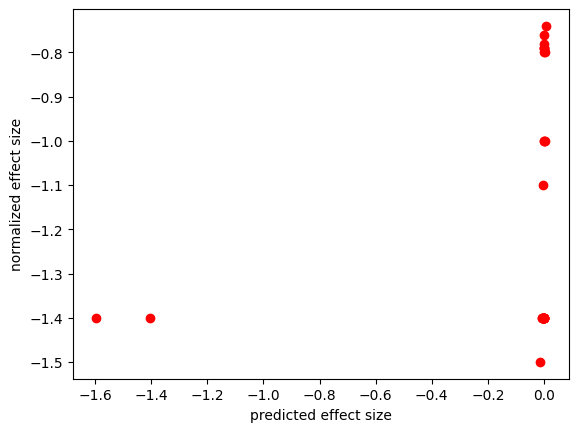

In [92]:
plt.plot(test['effect_size'], df_variant['nes'], 'or')
plt.xlabel('predicted effect size')
plt.ylabel('normalized effect size')

In [79]:
a = 1

In [80]:
import grelu.variant

odds = grelu.variant.predict_variant_effects(
    variants=df_variant,
    model=model, 
    devices=0, # Run on GPU 0
    num_workers=8,
    batch_size=8,
    genome="hg38",
    compare_func="log2FC", # Return the log2 fold change between alt and ref predictions
    return_ad=True, # Return an anndata object.
    rc = True, # Reverse complement the ref/alt predictions and average them.
)

making dataset


/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/tl688/.conda/envs/evo/lib/python3.11/site-pack ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK:

Predicting: 0it [00:00, ?it/s]

/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [81]:
# Calculate the mean variant effect across all cell types
mean_variant_effect = odds.X.mean(1) 

In [82]:
sum((mean_variant_effect<0)*1) / len(mean_variant_effect)

0.7142857142857143

Text(0, 0.5, 'mean variant effect')

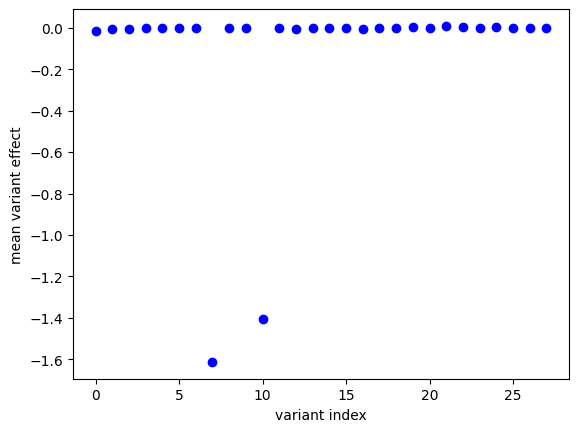

In [82]:
plt.plot(mean_variant_effect, 'bo')
plt.xlabel('variant index')
plt.ylabel('mean variant effect')

In [83]:
odds.var

""
name
pred


In [84]:
# Calculate the variant effect only in microglia
microglia_effect = odds[:, 'pred'].X.squeeze() 

In [85]:
# specific_variant_idx = np.where(
#     (microglia_effect < -2) & (mean_variant_effect >= 0) 
# )[0]
# specific_variant_idx

In [86]:
from grelu.transforms.prediction_transforms import Aggregate
microglia_score = Aggregate(tasks=["pred"], model=model)

In [87]:
len(microglia_effect)

28

In [88]:
variant = odds.copy()

In [89]:
ref_seq, alt_seq = grelu.variant.variant_to_seqs(
    seq_len=model.data_params['train_seq_len'],
    genome='hg38',
    **variant.obs.iloc[10][["chrom", "pos", "ref", "alt"]]
)

# ref_seq, alt_seq

In [90]:
import grelu.interpret.score

ref_attrs = grelu.interpret.score.get_attributions(
    model, ref_seq, prediction_transform=microglia_score, device=0,
    seed=0, method="inputxgradient",
)

alt_attrs = grelu.interpret.score.get_attributions(
    model, alt_seq, prediction_transform=microglia_score, device=0,
    seed=0, method="inputxgradient",
)

/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [91]:
ref_attrs.shape

(1, 4, 49000)

In [92]:
alt_attrs.shape

(1, 4, 49000)

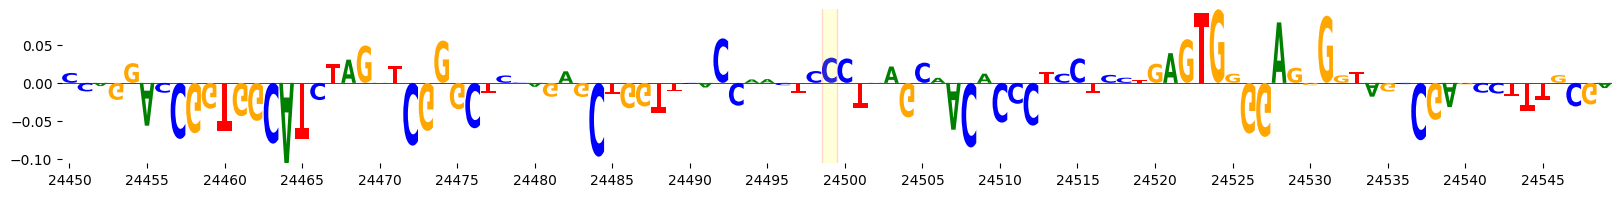

In [93]:
import grelu.visualize
grelu.visualize.plot_attributions(
    ref_attrs, start_pos=49000//2-50, end_pos=49000//2+50,
    highlight_positions=[49000//2-1], ticks=5,
    edgecolor='red'
)

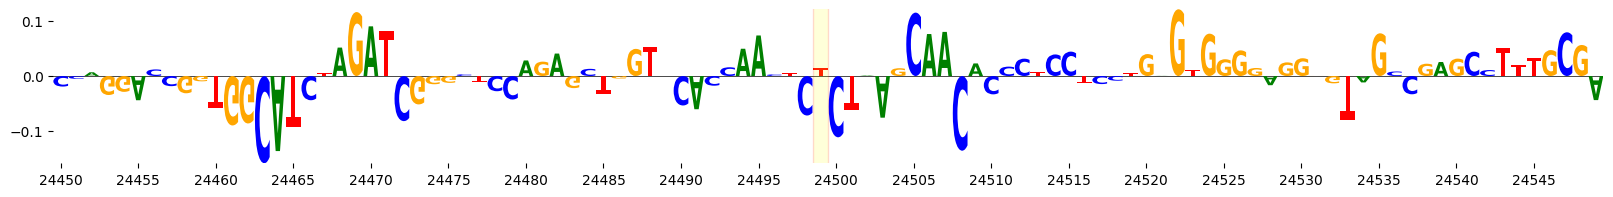

In [94]:
import grelu.visualize
grelu.visualize.plot_attributions(
    alt_attrs, start_pos=49000//2-50, end_pos=49000//2+50,
    highlight_positions=[49000//2-1], ticks=5,
    edgecolor='red'
)

In [95]:
import grelu.interpret.score

In [96]:
ism = grelu.interpret.score.ISM_predict(
    ref_seq,
    model,
    prediction_transform=microglia_score, # Focus on the prediction in microglia
    compare_func = "log2FC", # Return the log2FC of the mutated sequence prediction w.r.t the reference sequence
    devices=0, # Index of the GPU to use
    num_workers=8,
    batch_size=8
)

/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/tl688/.conda/envs/evo/lib/python3.11/site-pack ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBL

Predicting: 0it [00:00, ?it/s]

/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/grelu/utils.py:25: RuntimeWarning: invalid value encountered in log2


In [97]:
import grelu.visualize

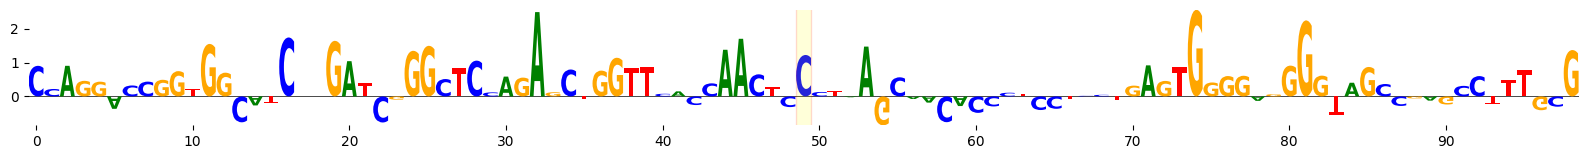

In [98]:
grelu.visualize.plot_ISM(
    ism, method='logo', figsize=(20, 1.5), start_pos=49000//2-50, end_pos=49000//2+50,
    highlight_positions=[49], edgecolor='red'
)

In [99]:
# ref_seq[49000//2-2:49000//2+2]

<Axes: >

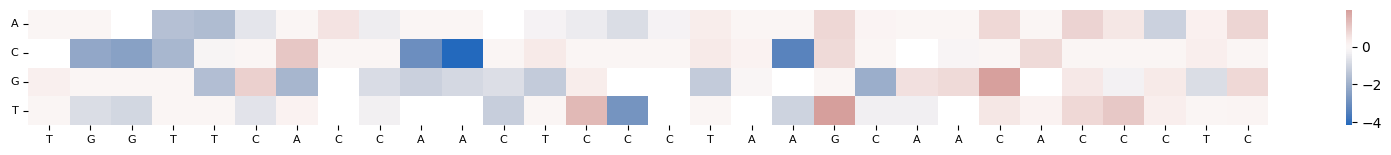

In [100]:
grelu.visualize.plot_ISM(
    ism, method="heatmap", center=0, figsize=(20, 1.5),start_pos=49000//2-15, end_pos=49000//2+15
)

In [102]:
model

LightningModel(
  (model): UKBioBERT_EnformerPretrainedModel(
    (embedding): EnformerTrunk(
      (conv_tower): EnformerConvTower(
        (blocks): ModuleList(
          (0): Sequential(
            (0): Conv1d(4, 768, kernel_size=(15,), stride=(1,), padding=same)
            (1): ConvBlock(
              (norm): Norm(
                (layer): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (conv): Conv1d(768, 768, kernel_size=(1,), stride=(1,), padding=same)
              (act): Activation(
                (layer): GELU()
              )
              (pool): Pool(
                (layer): AttentionPool(
                  (pool_fn): Rearrange('b d (n p) -> b d n p', p=2)
                  (to_attn_logits): Conv2d(768, 768, kernel_size=(1, 1), stride=(1, 1), bias=False)
                )
              )
              (dropout): Dropout(
                (layer): Identity()
              )
              (channel_transform)

In [131]:
import math
from pathlib import Path

import torch
from torch import nn, einsum
import torch.nn.functional as F
import torch.distributed as dist
from torch.utils.checkpoint import checkpoint_sequential

from einops import rearrange, reduce
from einops.layers.torch import Rearrange

from enformer_pytorch.data import str_to_one_hot, seq_indices_to_one_hot

from enformer_pytorch.config_enformer import EnformerConfig

from transformers import PreTrainedModel

# constants

SEQUENCE_LENGTH = 196_608
TARGET_LENGTH = 896

# helpers

def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def always(val):
    def inner(*args, **kwargs):
        return val
    return inner

def map_values(fn, d):
    return {key: fn(values) for key, values in d.items()}

def exponential_linspace_int(start, end, num, divisible_by = 1):
    def _round(x):
        return int(round(x / divisible_by) * divisible_by)

    base = math.exp(math.log(end / start) / (num - 1))
    return [_round(start * base**i) for i in range(num)]

def log(t, eps = 1e-20):
    return torch.log(t.clamp(min = eps))

# maybe sync batchnorm, for distributed training

def MaybeSyncBatchnorm(is_distributed = None):
    is_distributed = default(is_distributed, dist.is_initialized() and dist.get_world_size() > 1)
    return nn.SyncBatchNorm if is_distributed else nn.BatchNorm1d

# losses and metrics

def poisson_loss(pred, target):
    return (pred - target * log(pred)).mean()

def pearson_corr_coef(x, y, dim = 1, reduce_dims = (-1,)):
    x_centered = x - x.mean(dim = dim, keepdim = True)
    y_centered = y - y.mean(dim = dim, keepdim = True)
    return F.cosine_similarity(x_centered, y_centered, dim = dim).mean(dim = reduce_dims)

# relative positional encoding functions

def get_positional_features_exponential(positions, features, seq_len, min_half_life = 3., dtype = torch.float):
    max_range = math.log(seq_len) / math.log(2.)
    half_life = 2 ** torch.linspace(min_half_life, max_range, features, device = positions.device)
    half_life = half_life[None, ...]
    positions = positions.abs()[..., None]
    return torch.exp(-math.log(2.) / half_life * positions)

def get_positional_features_central_mask(positions, features, seq_len, dtype = torch.float):
    center_widths = 2 ** torch.arange(1, features + 1, device = positions.device).to(dtype)
    center_widths = center_widths - 1
    return (center_widths[None, ...] > positions.abs()[..., None]).to(dtype)

def gamma_pdf(x, concentration, rate):
    log_unnormalized_prob = torch.xlogy(concentration - 1., x) - rate * x
    log_normalization = (torch.lgamma(concentration) - concentration * torch.log(rate))
    return torch.exp(log_unnormalized_prob - log_normalization)

def get_positional_features_gamma(positions, features, seq_len, stddev = None, start_mean = None, eps = 1e-8, dtype = torch.float):
    if not exists(stddev):
        stddev = seq_len / (2 * features)

    if not exists(start_mean):
        start_mean = seq_len / features

    mean = torch.linspace(start_mean, seq_len, features, device = positions.device)

    mean = mean[None, ...]
    concentration = (mean / stddev) ** 2
    rate = mean / stddev ** 2

    probabilities = gamma_pdf(positions.to(dtype).abs()[..., None], concentration, rate)
    probabilities = probabilities + eps
    outputs = probabilities / torch.amax(probabilities, dim = -1, keepdim = True)
    return outputs

def get_positional_embed(seq_len, feature_size, device, use_tf_gamma, dtype = torch.float):
    distances = torch.arange(-seq_len + 1, seq_len, device = device)

    assert not use_tf_gamma or seq_len == 1536, 'if using tf gamma, only sequence length of 1536 allowed for now'

    feature_functions = [
        get_positional_features_exponential,
        get_positional_features_central_mask,
        get_positional_features_gamma if not use_tf_gamma else always(TF_GAMMAS.to(device))
    ]

    num_components = len(feature_functions) * 2

    if (feature_size % num_components) != 0:
        raise ValueError(f'feature size is not divisible by number of components ({num_components})')

    num_basis_per_class = feature_size // num_components

    embeddings = []
    for fn in feature_functions:
        embeddings.append(fn(distances, num_basis_per_class, seq_len, dtype = dtype))

    embeddings = torch.cat(embeddings, dim = -1)
    embeddings = torch.cat((embeddings, torch.sign(distances)[..., None] * embeddings), dim = -1)
    return embeddings.to(dtype)

def relative_shift(x):
    to_pad = torch.zeros_like(x[..., :1])
    x = torch.cat((to_pad, x), dim = -1)
    _, h, t1, t2 = x.shape
    x = x.reshape(-1, h, t2, t1)
    x = x[:, :, 1:, :]
    x = x.reshape(-1, h, t1, t2 - 1)
    return x[..., :((t2 + 1) // 2)]

def get_attenion(model, x):
    print(x.shape)
    n, h, device = x.shape[-2], model.heads, x.device

    q = model.to_q(x)
    k = model.to_k(x)
    v = model.to_v(x)

    q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = h), (q, k, v))

    q = q * model.scale

    content_logits = einsum('b h i d, b h j d -> b h i j', q + model.rel_content_bias, k)

    positions = get_positional_embed(n, model.num_rel_pos_features, device, use_tf_gamma = model.use_tf_gamma, dtype = model.to_rel_k.weight.dtype)
    positions = model.pos_dropout(positions)
    rel_k = model.to_rel_k(positions)

    rel_k = rearrange(rel_k, 'n (h d) -> h n d', h = h)
    rel_logits = einsum('b h i d, h j d -> b h i j', q + model.rel_pos_bias, rel_k)
    rel_logits = relative_shift(rel_logits)

    logits = content_logits + rel_logits
    attn = logits.softmax(dim = -1)
    print(attn.shape)
    attn = model.attn_dropout(attn)
    print(attn.shape)
    return attn

In [132]:
import os
import warnings
from typing import Callable, List, Optional, Union

import numpy as np
import pandas as pd
import torch
from captum.attr import DeepLiftShap, InputXGradient, IntegratedGradients
from torch import Tensor

from grelu.sequence.format import convert_input_type
def get_attention_scores_enformer(
    model,
    seqs,
    block_idx,
    genome,
):
    """
    Get the attention scores from a model's transformer layers, for a given input sequence.

    Args:
        model: A trained deep learning model
        seq: Input sequences as genoic intervals, strings or in index or one-hot encoded format.
        block_idx: Index of the transformer layer to use, ranging from 0 to n_transformers-1.
            If None, attention scores from all transformer layers will be returned.
        genome: Name of the genome to use if genomic intervals are supplied.

    Returns:
        Numpy array of shape (Layers, Heads, L, L) if block_idx is None or (Heads, L, L) otherwise.
    """
    # One-hot encode the input sequence
    x = convert_input_type(seqs, "one_hot", genome=genome)
    print(x.shape)
    if x.ndim == 2:
        x = x.unsqueeze(0)

    # Pass input through convolutional layers
    x = model.model.embedding.conv_tower(x)
    if isinstance(x, tuple):
        x = x[0]
    x = x.swapaxes(1, 2)

    if block_idx is None:
        # All blocks
        attn = []
        for block in model.model.embedding.transformer_tower.blocks:
            attn.append(get_attenion(block.mha, block.norm(x)))
            x = block(x)
        attn = torch.stack(attn, axis=1)
    else:
        # Single block
        for block in model.model.embedding.transformer_tower.blocks[:block_idx]:
            x = block(x)
            print(x)
        block = model.model.embedding.transformer_tower.blocks[block_idx]
        attn = get_attenion(block.mha, block.norm(x))

    return attn.squeeze(0).detach().cpu().numpy()

In [133]:
import grelu.interpret.score

from grelu.model.layers import (
    Activation,
    Attention,
    ChannelTransform,
    Crop,
    Dropout,
    Norm,
    Pool,
)

# attn = grelu.interpret.score.get_attention_scores(
#     model=model,
#     seqs=ref_seq[49000//2-15:49000//2+15], # You can also supply just the genomic interval
#     genome='hg38',
#     block_idx=-1, # We take attention weights from the final transformer layer
# )

# attn.shape

attn = get_attention_scores_enformer(
    model=model,
    seqs='AACCGGTTCGATTAGG', # You can also supply just the genomic interval
    genome='hg38',
    block_idx=-1, # We take attention weights from the final transformer layer
)

attn.shape

torch.Size([4, 16])
torch.Size([1, 1, 1536])
torch.Size([1, 8, 1, 1])
torch.Size([1, 8, 1, 1])


(8, 1, 1)

In [123]:
# attn

In [124]:
model.model.embedding.transformer_tower

EnformerTransformerTower(
  (blocks): ModuleList(
    (0): EnformerTransformerBlock(
      (norm): Norm(
        (layer): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
      )
      (mha): Attention(
        (to_q): Linear(in_features=1536, out_features=512, bias=False)
        (to_k): Linear(in_features=1536, out_features=512, bias=False)
        (to_v): Linear(in_features=1536, out_features=1536, bias=False)
        (to_out): Linear(in_features=1536, out_features=1536, bias=True)
        (to_rel_k): Linear(in_features=192, out_features=512, bias=False)
        (pos_dropout): Dropout(p=0.01, inplace=False)
        (attn_dropout): Dropout(p=0.05, inplace=False)
      )
      (dropout): Dropout(
        (layer): Dropout(p=0.4, inplace=False)
      )
      (ffn): FeedForwardBlock(
        (dense1): LinearBlock(
          (norm): Norm(
            (layer): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
          )
          (linear): Linear(in_features=1536, out_features=

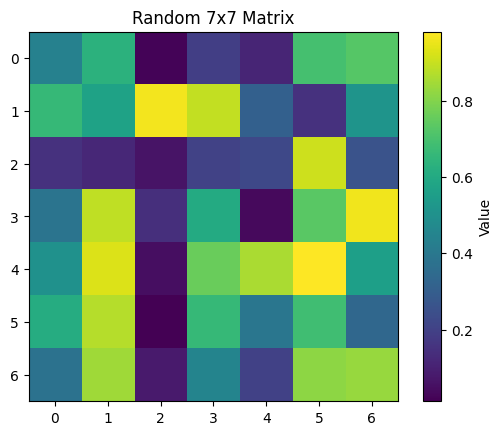

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random 7x7 matrix
matrix = np.random.rand(7, 7)

# Plot the matrix
plt.imshow(matrix, cmap='viridis')  # 'viridis' is a nice default colormap
plt.colorbar(label='Value')         # Add a colorbar for reference
plt.title('Random 7x7 Matrix')
plt.show()
